### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Data Exploration

In [2]:
# Load the  dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Here we observe that total charges dtype is object let's change it.

In [8]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [9]:
# Check for duplicated entries
df.duplicated().sum()

0

In [10]:
# Check for null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Handling null values

In [11]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- Even though the MonthlyCharges column is not empty,the tenure colum is 0.
- Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [12]:
df = df.drop(df[df['tenure'] == 0].index, axis=0)

Filling missing values in TotalCharges column with the mean of TotalCharges values.

In [13]:
df = df.fillna(df['TotalCharges'].mean())

In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Exploratory Data Analysis

In [16]:
# Removing redundant columns
df = df.drop('customerID',axis=1)

In [17]:
# Stats summary of numerical data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
# Stats summary of categorical data
df.describe(include='O')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


#### Data Visualization

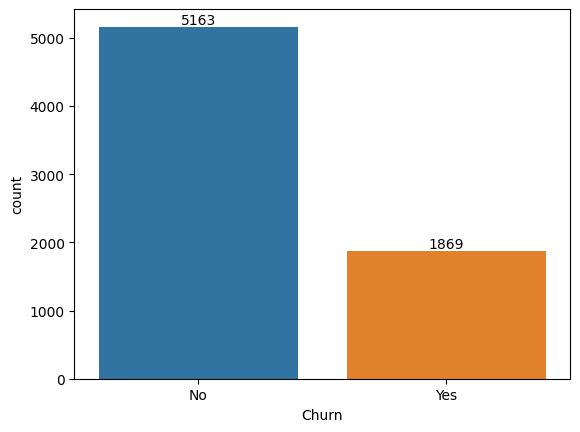

In [19]:
ax = sns.countplot(x=df['Churn'], data=df, hue='Churn')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

The count plot shows that the number of churned customers is significantly lower than the number of non-churned customers.

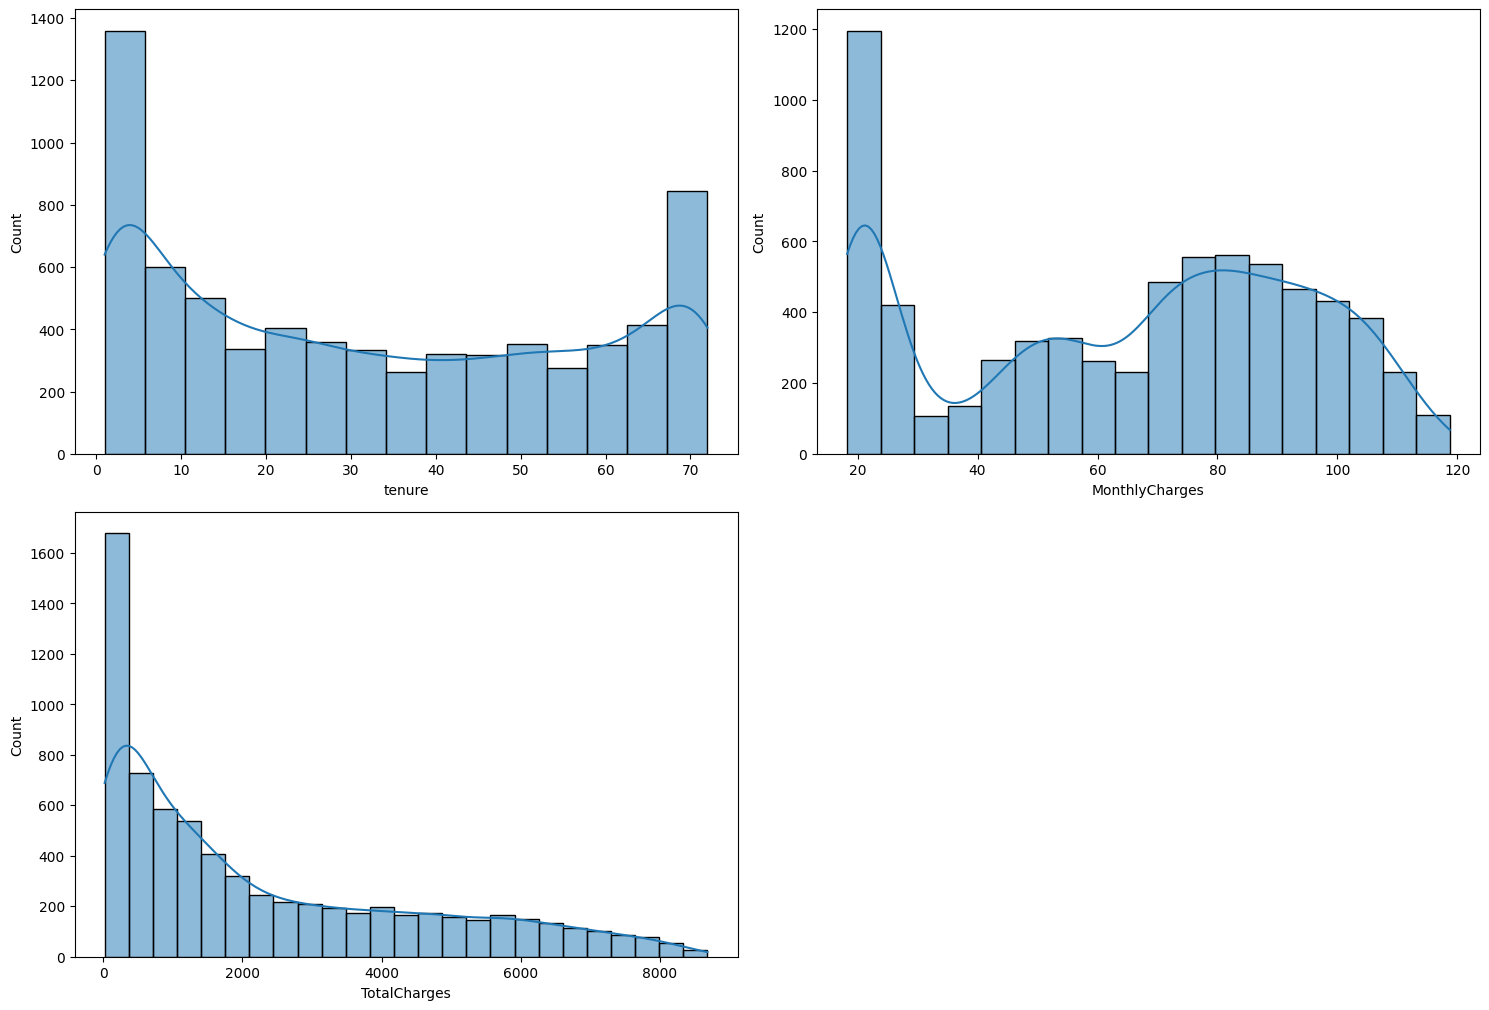

In [20]:
# Distribution of numerical columns
plt.figure(figsize=(15,50))
num_cols = ['tenure','MonthlyCharges','TotalCharges']
for i,col in enumerate(num_cols):
    plt.subplot(10,2,i+1)
    sns.histplot(x=df[col],kde=True)
plt.tight_layout()
plt.show()

##### Relationship between Features and Target

<Axes: xlabel='Churn', ylabel='tenure'>

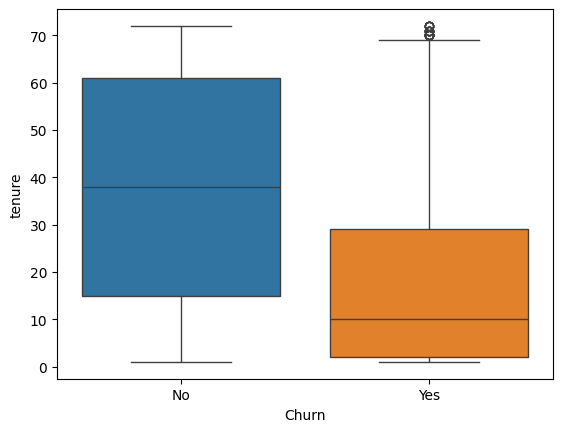

In [21]:
# tenure vs Churn
sns.boxplot(x=df['Churn'],y=df['tenure'],data=df,hue='Churn')

Customers with a longer tenure are less likely to churn.

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

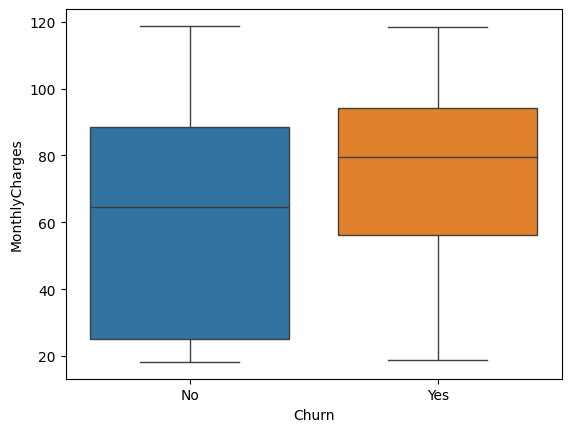

In [22]:
# MonthlyCharges vs Churn
sns.boxplot(x=df['Churn'],y=df['MonthlyCharges'],data=df,hue='Churn')

Higher monthly charges might drive churn due to cost dissatisfaction.

<Axes: xlabel='Churn', ylabel='TotalCharges'>

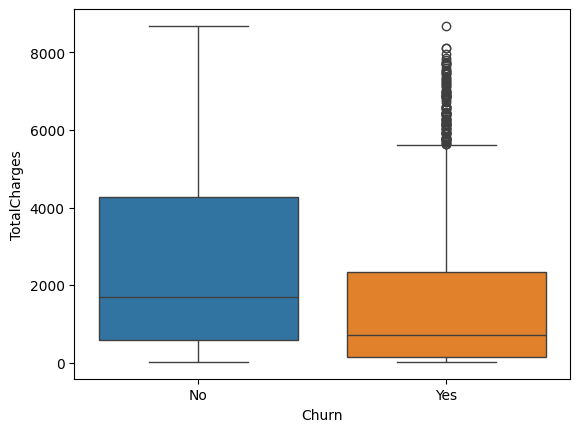

In [23]:
# TotalCharges vs Churn
sns.boxplot(x=df['Churn'],y=df['TotalCharges'],data=df,hue='Churn')

Customers with higher total charges (indicating long-term customers) were less likely to churn.

<Axes: xlabel='Partner', ylabel='count'>

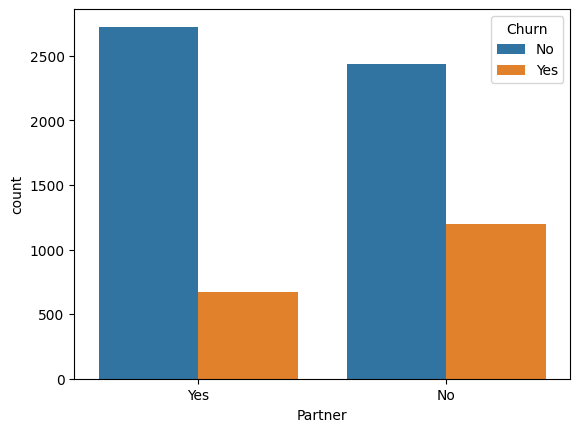

In [24]:
# Partner vs Churn
sns.countplot(x=df['Partner'],hue=df['Churn'])

Customers without a partner are more likely to churn compared to those with a partner.

<Axes: xlabel='InternetService', ylabel='count'>

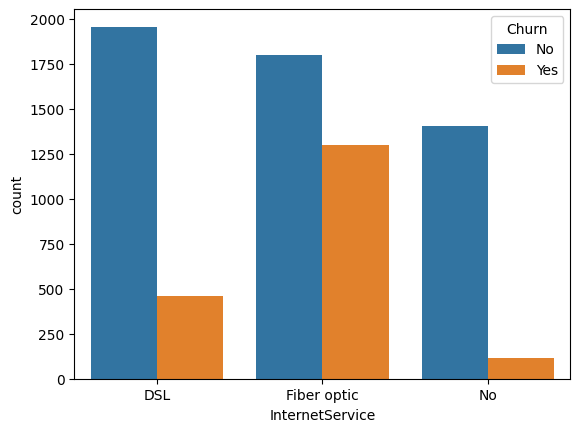

In [25]:
# InternetService vs Churn
sns.countplot(x=df['InternetService'],hue=df['Churn'])

Customers using Fiber Optic internet had the highest churn rate compared to those using DSL or those with no internet service.

<Axes: xlabel='OnlineSecurity', ylabel='count'>

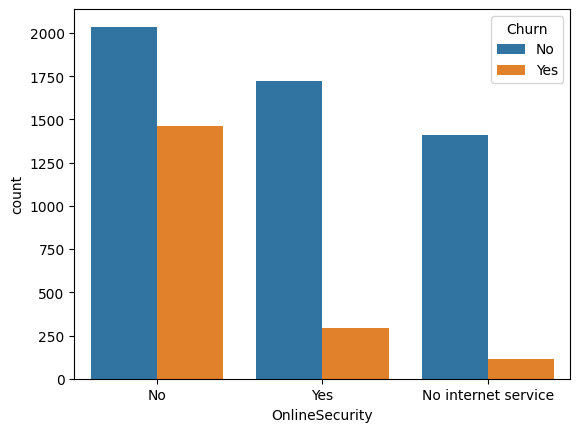

In [26]:
# OnlineSecurity vs Churn
sns.countplot(x=df['OnlineSecurity'],hue=df['Churn'])

Customers with Online Security or Tech Support were significantly less likely to churn.

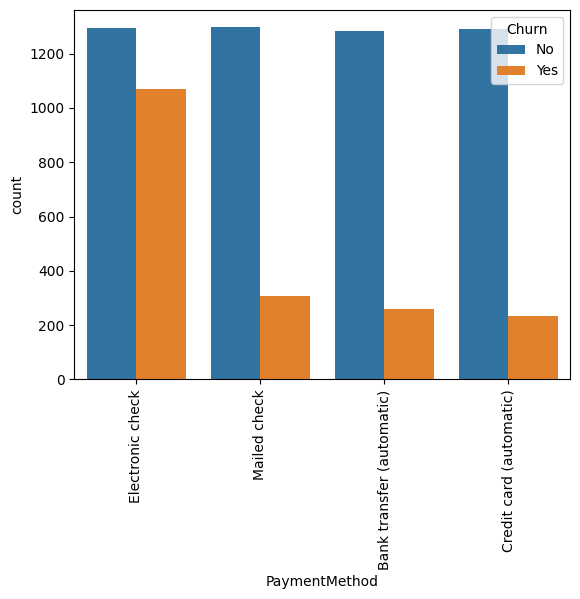

In [27]:
# PaymentMethod vs Churn
sns.countplot(x=df['PaymentMethod'],hue=df['Churn'])
plt.xticks(rotation='vertical')
plt.show()

Customers using electronic checks have the highest churn.

<Axes: xlabel='Contract', ylabel='count'>

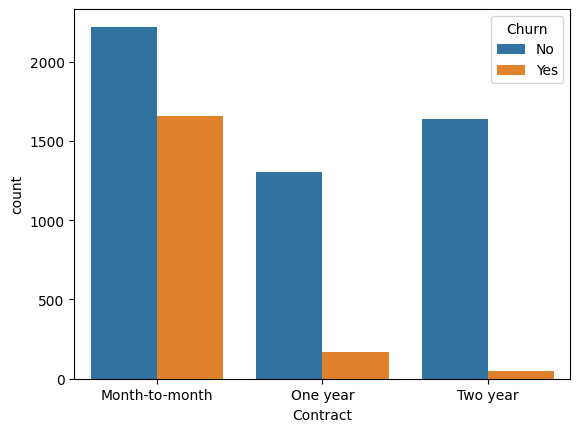

In [28]:
# Contract vs Churn
sns.countplot(x=df['Contract'],hue=df['Churn'])

Customers with a month-to-month contract are more likely to churn compared to those with longer-term contracts.

##### Relationship between Features

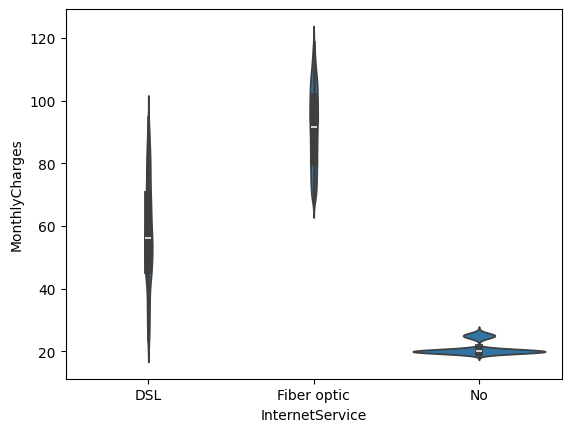

In [29]:
# InternetService and MonthlyCharges 
sns.violinplot(x='InternetService', y='MonthlyCharges', data=df)
plt.show()

Fiber optic internet service is more expensive compared to other types of internet services.

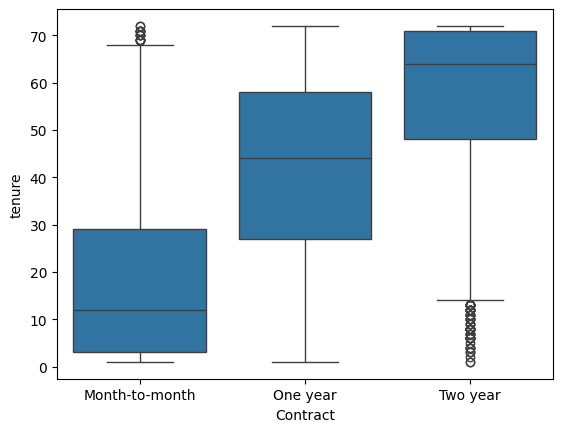

In [30]:
# Tenure Distribution by contract type
sns.boxplot(x='Contract', y='tenure', data=df)
plt.show()

Customers with a 2-year contract tend to have a longer tenure, which suggests they are less likely to churn.

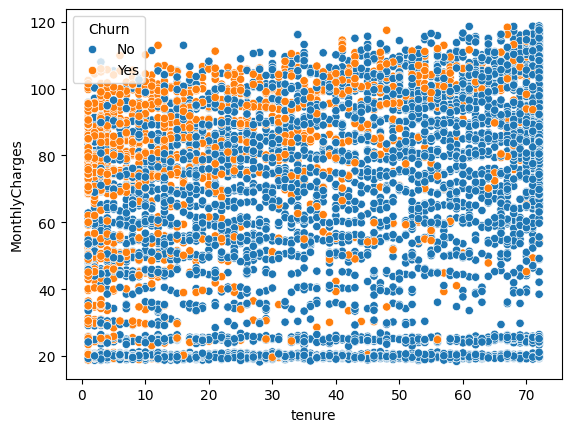

In [31]:
# Monthly charges based on tenure
sns.scatterplot(x='tenure',y='MonthlyCharges',data=df,hue='Churn')
plt.show()

As tenure increases, MonthlyCharges tend to vary, with some customers having higher or lower charges.

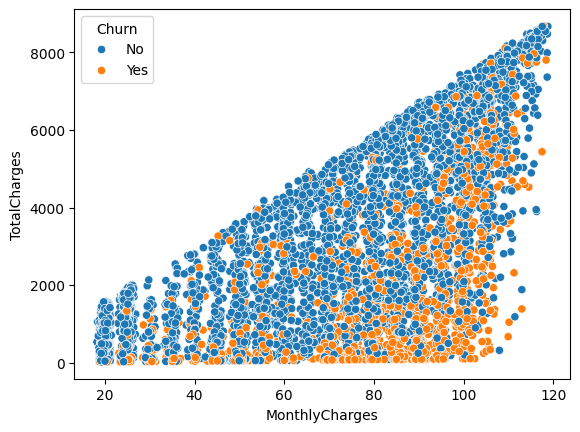

In [32]:
# Monthly charges and Totalcharges
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df,hue='Churn')
plt.show()

As MonthlyCharges increase, TotalCharges also tend to increase.

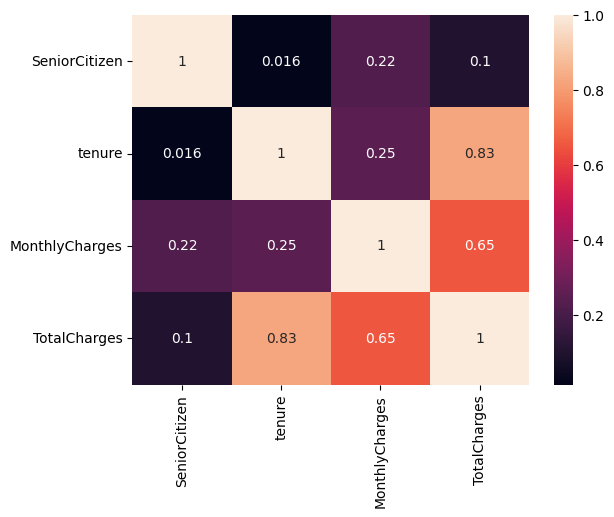

In [33]:
# Correlation heatmap
sns.heatmap(data=df.select_dtypes(include=['number']).corr(),annot=True)
plt.show()

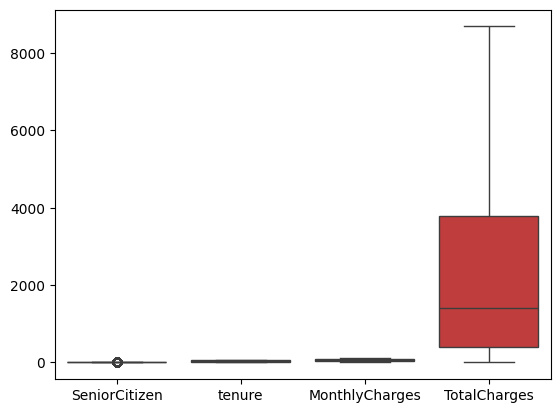

In [34]:
# Check for outliers
sns.boxplot(data=df)
plt.show()

### Data Preprocessing

#### Encoding categorical data

In [35]:
# Label Encoding
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
encoder = LabelEncoder()
for column in cat_cols:
    df[column] = encoder.fit_transform(df[column])

In [36]:
# Feature Separartion
X = df.drop('Churn',axis=1)
y = df.Churn

In [37]:
# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Model Training

#### Decision Tree

In [38]:
# Define the model
dtree = DecisionTreeClassifier()

##### Hyperparameter Tuning using GridSearchCV

In [39]:
# Parameter grid
param_grid = {
    'max_depth': [3,6,9,12,15],
    'min_samples_split': [2,4,6,8,10],
    'min_samples_leaf': [1,3,5,7,9],
    'criterion': ['gini', 'entropy']
}

In [40]:
# Define the GridSearchCV
grid_search_dt = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search_dt.best_params_)

Fitting 3 folds for each of 250 candidates, totalling 750 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 4}


In [41]:
# Decision Tree Classifier Object with best parameters
dtree = grid_search_dt.best_estimator_

# Fitting the data
dtree.fit(X_train, y_train)

# Training accuracy
print('Training Accuracy: ', dtree.score(X_train, y_train))

# Predicting the values
dtree_pred = dtree.predict(X_test)

Training Accuracy:  0.8103111111111111


#### Random Forest

In [42]:
# Define the model
rfc = RandomForestClassifier()

##### Hyperparameter Tuning using GridSearchCV

In [43]:
# Parameter grid
param_grid = {
    'max_depth': [5,10,15,20,None],
    'min_samples_split': [1,2,3,4,5],
    'min_samples_leaf': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
}

In [ ]:
# Define the GridSearchCV
grid_search_rf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search_rf.best_params_)

Fitting 3 folds for each of 250 candidates, totalling 750 fits


In [ ]:
# Random Forest Classifier Object with best parameters
rfc = grid_search_rf.best_estimator_

# Fitting the data
rfc.fit(X_train, y_train)

# Training accuracy
print('Training Accuracy: ', rfc.score(X_train, y_train))

# Predicting the values
rfc_pred = rfc.predict(X_test)

### Model Evaluation

#### Classification Report

In [ ]:
print('Decision Tree Classification Report: \n', classification_report(y_test, dtree_pred))
print('-----'*10)
print('Random Forest Classification Report: \n', classification_report(y_test, rfc_pred))

#### Confusion Matrix

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Decision Tree Confusion Matrix
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, ax=ax[0],fmt='d').set_title('Decision Tree Confusion Matrix')

#Random Forest Confusion Matrix
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[1],fmt='d').set_title('Random Forest Confusion Matrix')
plt.show()

#### KDE Plot

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

#Decision Tree 
sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[0]).set_title('Decision Tree')
sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values" , ax=ax[0])

#Random Forest
sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[1]).set_title('Random Forest')
sns.distplot(rfc_pred, hist=False, color="b", label="Fitted Values" , ax=ax[1])
plt.show()

From the above models, the **Random Forest Classifier** has the highest accuracy of 80%. For class 1, it has better precision (0.67) but slightly lower recall (0.50) compared to the Decision Tree (0.57 precision, 0.51 recall). However, the Random Forest model achieves a higher F1-score (0.57 vs. 0.54), making it a more suitable choice for predicting customer churn.

### Feature Importance

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
# Decision Tree Classifier Feature Importance
feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': dtree.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax=ax[0]).set_title('Decision Tree Classifier Feature Importance')

# Random Forest Classifier Feature Importance
feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': rfc.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax=ax[1]).set_title('Random Forest Classifier Feature Importance')
plt.show()

From both the models, it is clear that **contract, tenure, monthly charges and total charges** are the most important features for predicting the customer churn. Therefore, the company should focus on these features to reduce the customer churn.